# Tutorial 05: Homework

To be handed in via email to [karel.klouda@fit.cvut.cz](mailto:karel.klouda@fit.cvut.cz) by **14/12** (Thursday group) and 22/12 (Friday group), respectively.


### Assignement
  * For the attached data (cleaned data from the 3rd tutorial) try to use linear regression (or ridge regression, if you will) applied on features given by PCA.
  * Try to select as less as possible features so that the results are comparably good (in terms of RMSLE) to the results obtained in the 3rd tutorial (RMSLE around 0.12).
  * Experiment with the feature selection:
    * Has removing indicator or discrete features a positive influence?
    * Are the first principal components always the best choice?

In [339]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, recall_score
%matplotlib inline
matplotlib.style.use('ggplot')

In [340]:
# loading data
data = pd.read_csv('dataHW05.csv')
data = data.drop([data.columns[0],data.columns[1]], axis=1)
data = data - data.mean()
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.10274,7.376712,-2066.828082,0.900685,-0.575342,31.732192,18.134247,92.882877,262.360274,-46.549315,...,-0.003425,-0.083562,-0.002055,0.132192,-0.069178,-0.00274,-0.008219,-0.013699,0.179452,-0.085616
1,-36.89726,22.376712,-916.828082,-0.099315,2.424658,4.732192,-8.865753,-103.117123,534.360274,-46.549315,...,-0.003425,-0.083562,-0.002055,0.132192,-0.069178,-0.00274,-0.008219,-0.013699,0.179452,-0.085616
2,3.10274,10.376712,733.171918,0.900685,-0.575342,29.732192,17.134247,58.882877,42.360274,-46.549315,...,-0.003425,-0.083562,-0.002055,0.132192,-0.069178,-0.00274,-0.008219,-0.013699,0.179452,-0.085616
3,13.10274,2.376712,-966.828082,0.900685,-0.575342,-56.267808,-14.865753,-103.117123,-227.639726,-46.549315,...,-0.003425,-0.083562,-0.002055,0.132192,0.930822,-0.00274,-0.008219,-0.013699,-0.820548,-0.085616
4,3.10274,26.376712,3743.171918,1.900685,-0.575342,28.732192,15.134247,246.882877,211.360274,-46.549315,...,-0.003425,-0.083562,-0.002055,0.132192,-0.069178,-0.00274,-0.008219,-0.013699,0.179452,-0.085616


In [341]:
# spliting data to train and test datasets
dtrain, dtest = train_test_split(data, test_size=0.25, random_state=458)
X = dtrain.drop(['SalePrice'], axis = 1, errors = 'ignore')
y = dtrain.SalePrice
Xtest = dtest.drop(['SalePrice'], axis = 1, errors = 'ignore')
ytest = dtest.SalePrice

In [342]:
# Linear Regression
clf1 = LinearRegression()
clf1.fit(X, y) 

# Print RMSLE
RMSLE = np.sqrt(mean_squared_error(clf1.predict(Xtest), ytest))
print('Root mean squared logarithmic error:', RMSLE)

Root mean squared logarithmic error: 0.272597091251


ridge regression

In [343]:
# Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X, y)
RMSLE = np.sqrt(mean_squared_error(ridge.predict(Xtest), ytest))
print('Root mean squared logarithmic error:', RMSLE)

Root mean squared logarithmic error: 0.171948746357


pca without scaling

In [344]:
q=10
pca = PCA(n_components=q)
pca.fit_transform(X)
X_1 = pca.transform(X)
Xtest_1 = pca.transform(Xtest)


In [345]:
RMSLE_lr = []
for n in range(1,q):
    Xsub1 = X_1[:,0:n]
    Xsubtest1 = Xtest_1[:,0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub1, y) 
    # save RMSLE
    RMSLE_lr.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest1), ytest)))

In [346]:
RMSLE_lr

[0.38620412494970385,
 0.31143935881970825,
 0.31643490079415687,
 0.32116585633914374,
 0.32273015235304831,
 0.32457758664124919,
 0.32374333949170758,
 0.31779164005943478,
 0.31037120196347939]

In [347]:
RMSLE_rr = []
for n in range(1,q):
    Xsub1 = X_1[:,0:n]
    Xsubtest1 = Xtest_1[:,0:n]
    clf2 = Ridge()
    clf2.fit(Xsub1, y) 
    # save RMSLE
    RMSLE_rr.append(np.sqrt(mean_squared_error(clf2.predict(Xsubtest1), ytest)))

In [348]:
RMSLE_rr

[0.38620412494968082,
 0.31143935854540911,
 0.31643490049794781,
 0.3211658559822903,
 0.3227301519860436,
 0.32457758620281824,
 0.323743339076354,
 0.31779163979609815,
 0.31037120195259438]

In [349]:
# Linear regression and ridge regression have very close results.

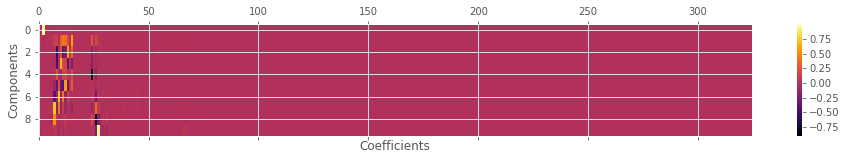

In [350]:
plt.matshow(pca.components_,aspect='auto',cmap='inferno')
plt.colorbar()
plt.xlabel("Сoefficients")
plt.ylabel("Сomponents")

pca with scaling

In [351]:
# scaling
pca.fit_transform(scale(X))
X_1 = pca.transform(scale(X))
Xtest_1 = pca.transform(scale(Xtest))


D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [352]:
RMSLE_scale_lr = []
for n in range(1,q):
    Xsub2 = X_2[:,0:n]
    Xsubtest2 = Xtest_2[:,0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub2, y) 
    # save RMSLE
    RMSLE_scale_lr.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest2), ytest)))

In [353]:
RMSLE_scale_lr

[0.20881124555375166,
 0.20657360464188432,
 0.20583941598122654,
 0.19997467048709444,
 0.19573177314294268,
 0.19547941738298638,
 0.19483141707538926,
 0.1945682215851747,
 0.19474609698995698]

In [354]:
RMSLE_scale_rr = []
for n in range(1,q):
    Xsub2 = X_2[:,0:n]
    Xsubtest2 = Xtest_2[:,0:n]
    clf2 = Ridge()
    clf2.fit(Xsub2, y) 
    # save RMSLE
    RMSLE_scale_rr.append(np.sqrt(mean_squared_error(clf2.predict(Xsubtest2), ytest)))

In [355]:
RMSLE_scale_rr

[0.20881079929868998,
 0.20657308032281221,
 0.20583894276466339,
 0.19997331634978188,
 0.1957288307806089,
 0.1954764987943074,
 0.19482852197751652,
 0.19456491705542905,
 0.1947427512078308]

In [356]:
#With scaling the results are better.

In [357]:
q=50
# scaling
pca = PCA(n_components=q)
pca.fit_transform(scale(X))
X_1 = pca.transform(scale(X))
Xtest_1 = pca.transform(scale(Xtest))

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [358]:
RMSLE_scale_lr = []
for n in range(1,q):
    Xsub1 = X_1[:,0:n]
    Xsubtest1 = Xtest_1[:,0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub1, y) 
    # save RMSLE
    RMSLE_scale_lr.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest1), ytest)))

In [359]:
RMSLE_scale_lr

[0.20881124704220264,
 0.20657360446298531,
 0.20583946571716871,
 0.19997465412011992,
 0.195732105862195,
 0.19547975991875244,
 0.1948343947276249,
 0.19457239981988747,
 0.19474952137524401,
 0.19355576002849667,
 0.19209746377105402,
 0.19288421536681966,
 0.19011064837139671,
 0.18966974816432558,
 0.1895716220300406,
 0.19070055829887148,
 0.19055053260869681,
 0.19053180372075129,
 0.18957591109556357,
 0.18949531764790994,
 0.18888293759587738,
 0.18881581133424077,
 0.18793192186708926,
 0.18630251181452906,
 0.18612241860967757,
 0.18619199748331439,
 0.18561339105122363,
 0.18501606303199772,
 0.18432877087177307,
 0.18432415783825568,
 0.18453807188114005,
 0.18453199910926746,
 0.18450082205851431,
 0.18281059639543829,
 0.18273731993037587,
 0.18225694181230884,
 0.18217480241819262,
 0.1817768402225152,
 0.18189024811555085,
 0.1814341028322877,
 0.17950412723535766,
 0.17945904653530523,
 0.17831523001505198,
 0.17817368360040706,
 0.17807618306906417,
 0.1781913284408

In [360]:
# It looks like value 0.12 is unreachable.

removing indicator 

In [361]:
display(data.columns[data.nunique() == 2])

Index(['HasMasVnrArea', 'HasBsmtFinSF1', 'HasBsmtFinSF2', 'HasBsmtUnfSF',
       'HasTotalBsmtSF', 'Has2ndFlrSF', 'HasLowQualFinSF', 'HasGarageArea',
       'HasWoodDeckSF', 'HasOpenPorchSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=262)

In [362]:
columns_to_remove = data.columns[data.nunique() == 2]

In [363]:
columns_to_remove

Index(['HasMasVnrArea', 'HasBsmtFinSF1', 'HasBsmtFinSF2', 'HasBsmtUnfSF',
       'HasTotalBsmtSF', 'Has2ndFlrSF', 'HasLowQualFinSF', 'HasGarageArea',
       'HasWoodDeckSF', 'HasOpenPorchSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=262)

In [364]:
data_without_ind = data.drop(columns_to_remove, axis = 1, errors = 'ignore')

In [365]:
dtrain, dtest = train_test_split(data_without_ind, test_size=0.25, random_state=458)
X = dtrain.drop(['SalePrice'], axis = 1, errors = 'ignore')
y = dtrain.SalePrice
Xtest = dtest.drop(['SalePrice'], axis = 1, errors = 'ignore')
ytest = dtest.SalePrice

In [366]:
q=11
pca = PCA(n_components=q)
pca.fit_transform(X)
X_1 = pca.transform(X)
Xtest_1 = pca.transform(Xtest)

In [367]:
RMSLE_lr = []
for n in range(1,q):
    Xsub1 = X_1[:,0:n]
    Xsubtest1 = Xtest_1[:,0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub1, y) 
    # save RMSLE
    RMSLE_lr.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest1), ytest)))

In [368]:
RMSLE_lr

[0.38620412509914415,
 0.31143978679863782,
 0.31643538339951216,
 0.32116637095859474,
 0.3227306063083793,
 0.32457811170299905,
 0.32374402597714891,
 0.3177924906295736,
 0.31037294092031725,
 0.30851333346467641]

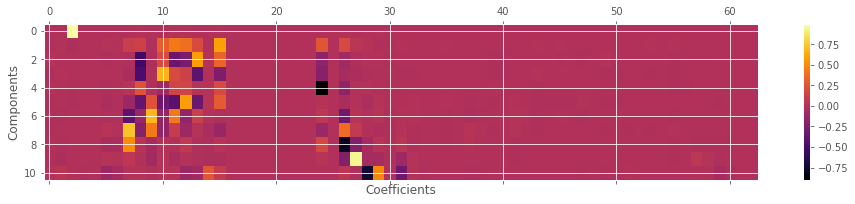

In [369]:
plt.matshow(pca.components_,aspect='auto',cmap='inferno')
plt.colorbar()
plt.xlabel("Сoefficients")
plt.ylabel("Сomponents")

In [370]:
q=50
pca = PCA(n_components=q)
pca.fit_transform(X)
X_2 = pca.transform(X)
Xtest_2 = pca.transform(Xtest)

In [371]:
RMSLE_scale_rr = []
for n in range(1,q):
    Xsub2 = X_2[:,0:n]
    Xsubtest2 = Xtest_2[:,0:n]
    clf2 = Ridge()
    clf2.fit(Xsub2, y) 
    # save RMSLE
    RMSLE_scale_rr.append(np.sqrt(mean_squared_error(clf2.predict(Xsubtest2), ytest)))

In [372]:
RMSLE_scale_rr

[0.38620412509912105,
 0.31143978652433785,
 0.31643538310330221,
 0.32116637060173986,
 0.32273060594137343,
 0.32457811126456704,
 0.32374402556179022,
 0.3177924903662282,
 0.31037294090939738,
 0.30851333356096355,
 0.30627738393129517,
 0.30656487163869706,
 0.30557898331985206,
 0.30541984451290288,
 0.30538449677668422,
 0.30957281730154579,
 0.30829683304414074,
 0.30970032843179623,
 0.2621315811545385,
 0.26191463755016942,
 0.25900012177289583,
 0.25528254614157442,
 0.25585246616446422,
 0.25585085639172328,
 0.25440522893837181,
 0.25320444197445641,
 0.25334895849350458,
 0.24967948986802951,
 0.24928490025244418,
 0.24673870109022586,
 0.24678522562916425,
 0.26604963818234689,
 0.25154368714161102,
 0.2227233378513106,
 0.19810071351451214,
 0.19387036776580208,
 0.19402682789469941,
 0.19205449512181924,
 0.19274592257446457,
 0.19217316580351823,
 0.19061627391747263,
 0.19058534271869051,
 0.19157385736776433,
 0.19572851609076145,
 0.19234939413689936,
 0.1976713499

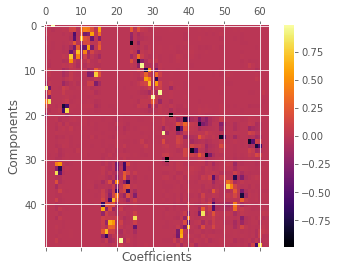

In [373]:
plt.matshow(pca.components_,aspect='auto',cmap='inferno')
plt.colorbar()
plt.xlabel("Сoefficients")
plt.ylabel("Сomponents")

In [ ]:
# Removing features has no influence for PCA (only heatmaps look better)
# If the data is noisy PCA will work incorrectly. Also, PCA transforms the data to a new coordinate system and it means, 
#that PCA tries to find a straight line (or plane) to separating data. Some data has more difficult correlation and PCA 
#not find the best axes.